In [1]:
import os
from pixelsort import pixelsort
from PIL import Image
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
photos_root = '/content/drive/MyDrive/Google Photos/'
photos_list = os.listdir(photos_root)

# Cleaning the data

Each file in the folder contains varying degree of dimensions. We need to clean the data, resize the images in a manner that they end up having the same size or sort

In [4]:
# total photos
print(len(photos_list))

9258


In [5]:
def glitchify(image, min_size = 500, fill_color = (255, 255, 255)):
  width, height = image.size
  width_ratio = min_size / width
  height_ratio = min_size / height
  min_ratio = min(width_ratio, height_ratio)
  width *= min_ratio
  height *= min_ratio
  width, height = round(width), round(height)
  resized_image = image.resize((width, height))
  new_image = Image.new('RGB', (min_size, min_size), fill_color)
  new_image.paste(resized_image, (int((min_size - width)/2), int((min_size - height)/2)))
  resized_image = new_image
  glitched_image = pixelsort(new_image)
  return resized_image, glitched_image

def generate_glitch():
  for file_name in photos_list:
    print(f'Glitching {file_name}.....')
    original = Image.open(os.path.join(photos_root, file_name))
    original, glitched = glitchify(original)
    print('Done!')
    yield (original, glitched)

# handle with care
def generate_glitches():
  return ([result in generate_glitch()])

Let's have a look at one original image and it's glitched image

In [6]:
generator = generate_glitch()
original, glitched = next(generator)

Glitching 2019-07-06 10:23:07.513.jpg.....
Done!


Glitching 2019-07-06 10:23:14.323.jpg.....
Done!


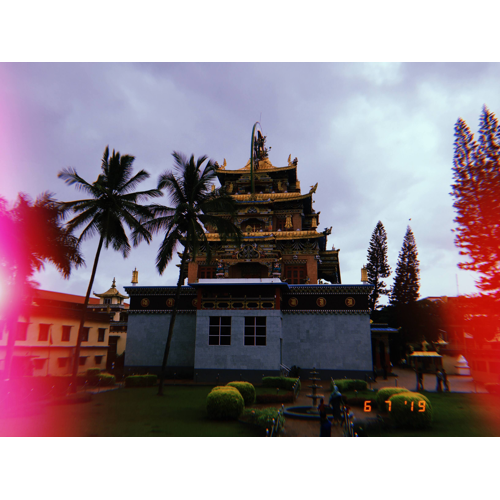

In [7]:
original, glitched = next(generator)
original

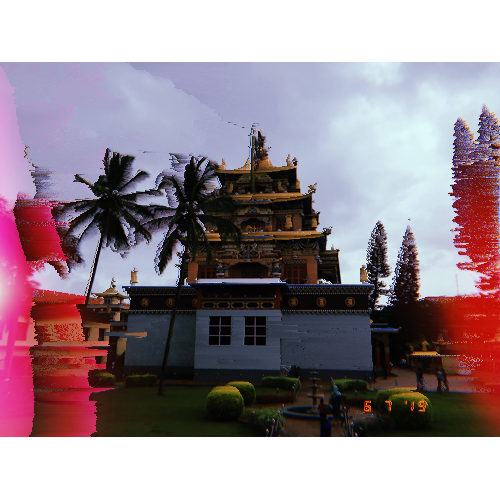

In [8]:
glitched

Now that we have written the function that takes an image as an input and generates glitched image, we need write functions to generate data in batches.

We also have to explore if we can use GPU in generating the data since that would speed up the whole process. 